In [1]:
# timestamp vs timespan/period
import pandas as pd

y = pd.Period('2019')
y

Period('2019', 'A-DEC')

In [2]:
# A-DEC means Anual - ending in december
dir(y) # list of class properties


['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_add_delta',
 '_from_ordinal',
 '_maybe_convert_freq',
 '_typ',
 'asfreq',
 'day',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'end_time',
 'freq',
 'freqstr',
 'hour',
 'is_leap_year',
 'minute',
 'month',
 'now',
 'ordinal',
 'quarter',
 'qyear',
 'second',
 'start_time',
 'strftime',
 'to_timestamp',
 'week',
 'weekday',
 'weekofyear',
 'year']

In [3]:
y.start_time

Timestamp('2019-01-01 00:00:00')

In [4]:
y.end_time

Timestamp('2019-12-31 23:59:59.999999999')

In [5]:
# monthly time period
mtp = pd.Period('2019-6', freq='M')
mtp

Period('2019-06', 'M')

In [6]:
mtp.start_time

Timestamp('2019-06-01 00:00:00')

In [7]:
mtp.end_time

Timestamp('2019-06-30 23:59:59.999999999')

In [8]:
# arithmetic operations
mtp + 1

Period('2019-07', 'M')

In [11]:
mtp2 = pd.Period('2020-02', freq='M')
mtp2 - mtp

<8 * MonthEnds>

In [12]:
# daily time period
dtp = pd.Period('2020-03-01')
dtp

Period('2020-03-01', 'D')

In [13]:
dtp + 1

Period('2020-03-02', 'D')

In [16]:
# 3min time period
tmtp = pd.Period('2020-03-01 09:30:00', freq='3min')
tmtp

Period('2020-03-01 09:30', '3T')

In [18]:
(tmtp + 1).start_time

Timestamp('2020-03-01 09:33:00')

In [20]:
# pandas offsets
tmtp + pd.offsets.Hour(5)

Period('2020-03-01 14:30', '3T')

In [24]:
# Quarterly Period
q = pd.Period('2020Q1')
q

Period('2020Q1', 'Q-DEC')

In [25]:
q + 2

Period('2020Q3', 'Q-DEC')

In [26]:
# fiscal year of the companies that don't match calendar (ending in january)
q = pd.Period('2020Q1', freq='Q-JAN')
q

Period('2020Q1', 'Q-JAN')

In [27]:
q.start_time # begins in Feb

Timestamp('2019-02-01 00:00:00')

In [28]:
# converting frequencies
q.asfreq('M', how="start") 

Period('2019-02', 'M')

In [32]:
#
q2 = pd.Period('2030Q2', freq='Q-Jan')
q2

Period('2030Q2', 'Q-JAN')

In [33]:
q2 - q

<41 * QuarterEnds: startingMonth=1>

In [34]:
# Period INDEX
# period to be used as index in datafram - fiscal year
idx = pd.period_range('2011', '2017', freq='Q-JAN')
idx

PeriodIndex(['2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
             '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3',
             '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1',
             '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
             '2017Q4'],
            dtype='period[Q-JAN]', freq='Q-JAN')

In [36]:
idx[0].start_time

Timestamp('2010-11-01 00:00:00')

In [37]:
idx[0].end_time


Timestamp('2011-01-31 23:59:59.999999999')

In [38]:
# set random series
import numpy as np
ps = pd.Series(np.random.randn(len(idx)), idx)
ps

2011Q4   -2.867487
2012Q1   -0.867018
2012Q2   -0.429261
2012Q3    0.061708
2012Q4   -0.201169
2013Q1    0.176848
2013Q2    0.615165
2013Q3    0.397142
2013Q4   -0.532696
2014Q1    0.118866
2014Q2   -0.510925
2014Q3   -0.034323
2014Q4    0.552978
2015Q1   -1.012844
2015Q2    1.441015
2015Q3   -0.860526
2015Q4    1.105243
2016Q1   -1.330394
2016Q2    0.725908
2016Q3    1.024381
2016Q4    0.443425
2017Q1    0.724383
2017Q2   -0.606153
2017Q3    0.272126
2017Q4   -0.117452
Freq: Q-JAN, dtype: float64

In [39]:
ps.index

PeriodIndex(['2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
             '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3',
             '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1',
             '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
             '2017Q4'],
            dtype='period[Q-JAN]', freq='Q-JAN')

In [41]:
# partial periods
ps['2011'] #only for the year 2011

2011Q4   -2.867487
2012Q1   -0.867018
2012Q2   -0.429261
2012Q3    0.061708
2012Q4   -0.201169
Freq: Q-JAN, dtype: float64

In [42]:
ps['2011':'2013']

2011Q4   -2.867487
2012Q1   -0.867018
2012Q2   -0.429261
2012Q3    0.061708
2012Q4   -0.201169
2013Q1    0.176848
2013Q2    0.615165
2013Q3    0.397142
2013Q4   -0.532696
2014Q1    0.118866
2014Q2   -0.510925
2014Q3   -0.034323
2014Q4    0.552978
Freq: Q-JAN, dtype: float64

In [43]:
# convert period index to datetime index
pst = ps.to_timestamp()
pst

2010-11-01   -2.867487
2011-02-01   -0.867018
2011-05-01   -0.429261
2011-08-01    0.061708
2011-11-01   -0.201169
2012-02-01    0.176848
2012-05-01    0.615165
2012-08-01    0.397142
2012-11-01   -0.532696
2013-02-01    0.118866
2013-05-01   -0.510925
2013-08-01   -0.034323
2013-11-01    0.552978
2014-02-01   -1.012844
2014-05-01    1.441015
2014-08-01   -0.860526
2014-11-01    1.105243
2015-02-01   -1.330394
2015-05-01    0.725908
2015-08-01    1.024381
2015-11-01    0.443425
2016-02-01    0.724383
2016-05-01   -0.606153
2016-08-01    0.272126
2016-11-01   -0.117452
Freq: QS-NOV, dtype: float64

In [44]:
pst.index

DatetimeIndex(['2010-11-01', '2011-02-01', '2011-05-01', '2011-08-01',
               '2011-11-01', '2012-02-01', '2012-05-01', '2012-08-01',
               '2012-11-01', '2013-02-01', '2013-05-01', '2013-08-01',
               '2013-11-01', '2014-02-01', '2014-05-01', '2014-08-01',
               '2014-11-01', '2015-02-01', '2015-05-01', '2015-08-01',
               '2015-11-01', '2016-02-01', '2016-05-01', '2016-08-01',
               '2016-11-01'],
              dtype='datetime64[ns]', freq='QS-NOV')

In [45]:
# convert back
pst.to_period()

2010Q4   -2.867487
2011Q1   -0.867018
2011Q2   -0.429261
2011Q3    0.061708
2011Q4   -0.201169
2012Q1    0.176848
2012Q2    0.615165
2012Q3    0.397142
2012Q4   -0.532696
2013Q1    0.118866
2013Q2   -0.510925
2013Q3   -0.034323
2013Q4    0.552978
2014Q1   -1.012844
2014Q2    1.441015
2014Q3   -0.860526
2014Q4    1.105243
2015Q1   -1.330394
2015Q2    0.725908
2015Q3    1.024381
2015Q4    0.443425
2016Q1    0.724383
2016Q2   -0.606153
2016Q3    0.272126
2016Q4   -0.117452
Freq: Q-DEC, dtype: float64

In [46]:
# Getting Financials excercise
# transpose the table
df = pd.read_csv("wmt.csv")
df

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


In [47]:
# set index
df.set_index('Line Item', inplace=True)
df

,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
Line Item,,,,,
Revenue,115904,120854,118179,130936,117542
Expenses,86544,89485,87484,97743,87688
Profit,29360,31369,30695,33193,29854


In [49]:
# now we transpose
df = df.T
df

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [51]:
df.index # index is not period yet

Index(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='object')

In [53]:
# make it period
df.index = pd.PeriodIndex(df.index, freq='Q-Jan')
df.index

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='period[Q-JAN]', freq='Q-JAN')

In [57]:
# create start date column
# (just assign new key)
df['StartDate'] = df.index.map(lambda x: x.start_time)
df['EndDate'] = df.index.map(lambda x: x.end_time)
df

Line Item,Revenue,Expenses,Profit,StartDate,EndDate
2017Q1,115904,86544,29360,2016-02-01,2016-04-30 23:59:59.999999999
2017Q2,120854,89485,31369,2016-05-01,2016-07-31 23:59:59.999999999
2017Q3,118179,87484,30695,2016-08-01,2016-10-31 23:59:59.999999999
2017Q4,130936,97743,33193,2016-11-01,2017-01-31 23:59:59.999999999
2018Q1,117542,87688,29854,2017-02-01,2017-04-30 23:59:59.999999999


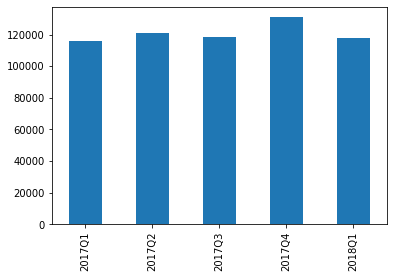

In [63]:
df.Revenue.plot(kind='bar')